In [1]:
import dtale
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Some functions to visualize the dataset

In [2]:
# To get insights inside columns
def plot_boxplot(df, column_name):

    ax = sns.boxplot(x=df[column_name])
    ax.set_xlabel(column_name)
    ax.set_title(f"Boxplot of {column_name}")

    # adding annotations
    mean_age = df[column_name].mean()
    min_age = df[column_name].min()
    max_age = df[column_name].max()
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    
    ax.annotate(f"Mean {column_name}: {mean_age:.1f}", xy=(mean_age, 0.95), xycoords='data', xytext=(50, 20),
                textcoords='offset points', fontsize=12, color='black', ha='center', va='center',
                arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))
    ax.annotate(f"Min {column_name}: {min_age}", xy=(min_age, 0.05), xycoords='data', xytext=(50, -20),
                textcoords='offset points', fontsize=12, color='black', ha='center', va='center',
                arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))
    ax.annotate(f"Max {column_name}: {max_age}", xy=(max_age, 0.05), xycoords='data', xytext=(-50, -20),
                textcoords='offset points', fontsize=12, color='black', ha='center', va='center',
                arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))
    ax.annotate(f"IQR: {q1:.1f} - {q3:.1f} = {iqr:.1f}", xy=((q1 + q3) / 2, 0.5), xycoords='data', xytext=(0, 20),
                textcoords='offset points', fontsize=12, color='black', ha='center', va='center',
                arrowprops=dict(arrowstyle='-', lw=1.5, color='black'))
    plt.show()

In [3]:
# To plot distribution of columns
def plot_distribution(df, column_name, bin_count=20):

    plt.xlabel(column_name)
    plt.ylabel("Customers count")
    plt.title(f"{column_name} distribution", fontsize=15)
    
    # adding annotations for bins
    bin_edges = np.histogram_bin_edges(df[column_name], bins=bin_count)
    bin_counts, _, _ = plt.hist(df[column_name], bins=bin_edges)
    for i in range(len(bin_edges)-1):
        plt.annotate(f"{bin_counts[i]:.0f}", xy=((bin_edges[i] + bin_edges[i+1]) / 2, bin_counts[i]), 
                     xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
    plt.show()

In [4]:
# To compare distribution of column with target
def plot_target_column_distribution(df, target, column_name):
    sns.boxplot(x=target, y=column_name,
                hue=target, data=df).set_title(f"{column_name} vs {target}", fontsize=15)
    
    # adding annotations
    counts = df.groupby([target])[column_name].count()

    plt.show()

In [5]:
# To plot pie chart for categorical vs target column
def plot_pie_chart(df, cat_col, binary_col):
    counts = df.groupby([binary_col, cat_col]).size().unstack()

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    for i, val in enumerate([0, 1]):
        ax = axes[i]
        ax.pie(counts.loc[val], labels=counts.columns, autopct='%1.1f%%', startangle=90)
        ax.set_title(f"{cat_col} for {binary_col}={val}")

    plt.show()


### Reading data

In [6]:
# Reading data
data_loc = "./Churn_Modelling.csv"
df = pd.read_csv(data_loc, index_col=0)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Unique values in each column

In [8]:
for idx,column in enumerate(df.columns):
    unique_values = df[column].unique()
    print("{}. {:<20} :: Unique value count :: {:<10}".format(idx,column, len(unique_values)), end='')
    if len(unique_values) < 15:
        print(f" :: {sorted(unique_values)}")
    else:
        print()

0. CustomerId           :: Unique value count :: 10000     
1. Surname              :: Unique value count :: 2932      
2. CreditScore          :: Unique value count :: 460       
3. Geography            :: Unique value count :: 3          :: ['France', 'Germany', 'Spain']
4. Gender               :: Unique value count :: 2          :: ['Female', 'Male']
5. Age                  :: Unique value count :: 70        
6. Tenure               :: Unique value count :: 11         :: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
7. Balance              :: Unique value count :: 6382      
8. NumOfProducts        :: Unique value count :: 4          :: [1, 2, 3, 4]
9. HasCrCard            :: Unique value count :: 2          :: [0, 1]
10. IsActiveMember       :: Unique value count :: 2          :: [0, 1]
11. EstimatedSalary      :: Unique value count :: 9999      
12. Exited               :: Unique value count :: 2          :: [0, 1]


# Basic understanding about dataset

- RowNumber: the index of the row in the dataset
- CustomerId: a unique identifier for each customer
- CreditScore: the customer's credit score
- Age: the customer's age
- Tenure: the number of years the customer has been with the bank
- Balance: the customer's account balance
- NumOfProducts: the number of bank products the customer has
- HasCrCard: whether the customer has a credit card with the bank (1=yes, 0=no)
- IsActiveMember: whether the customer is an active member of the bank (1=yes, 0=no)
- EstimatedSalary: the customer's estimated salary
- Exited: whether the customer has churned (left the bank) (1=yes, 0=no)

## Class Distribution

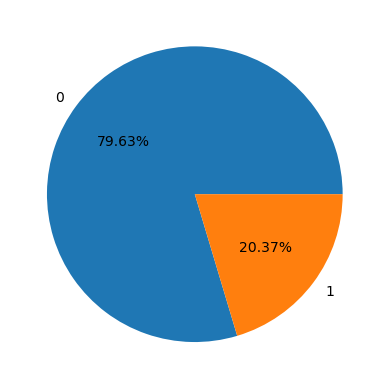

In [9]:
plt.pie(df["Exited"].value_counts(), 
        labels=sorted(df['Exited'].unique()),
        autopct='%1.2f%%')
plt.show()

## Box plots

CreditScore


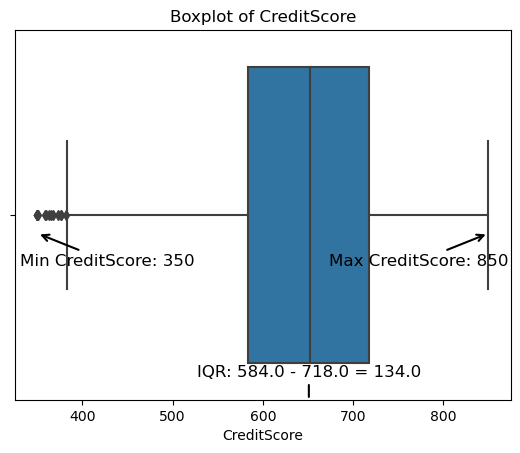

Age


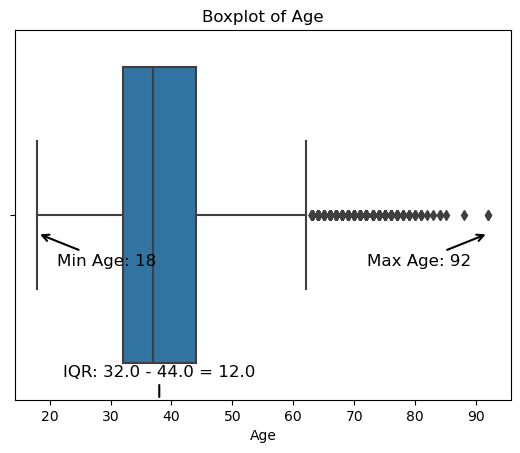

Tenure


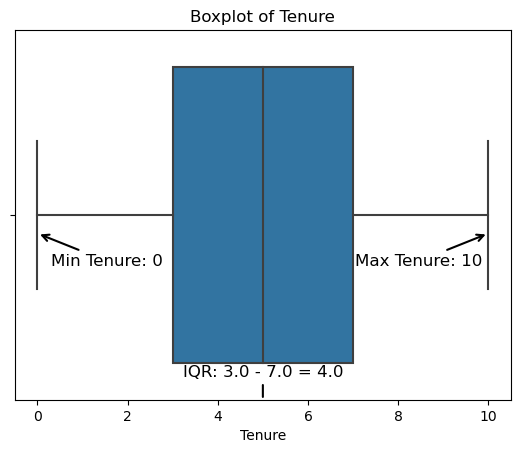

Balance


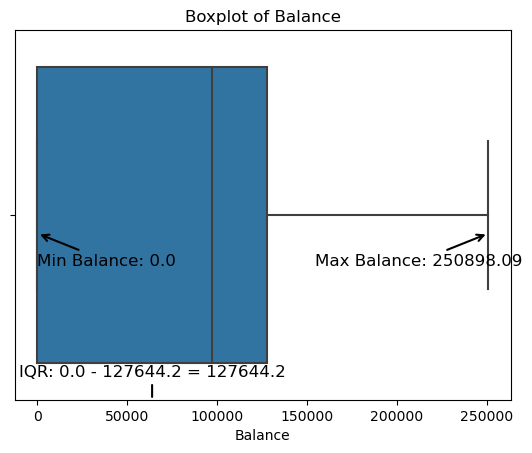

NumOfProducts


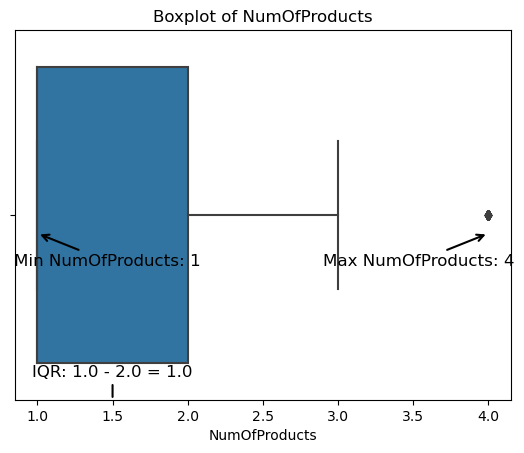

HasCrCard


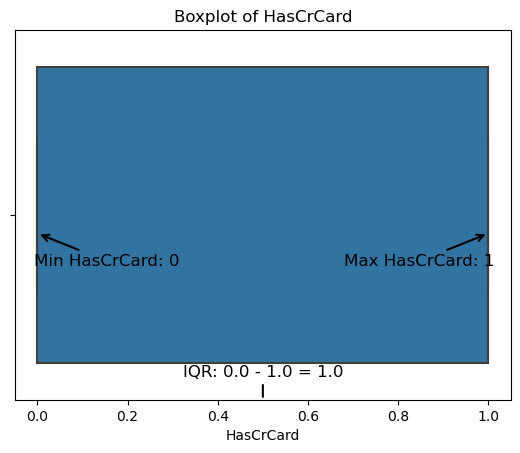

IsActiveMember


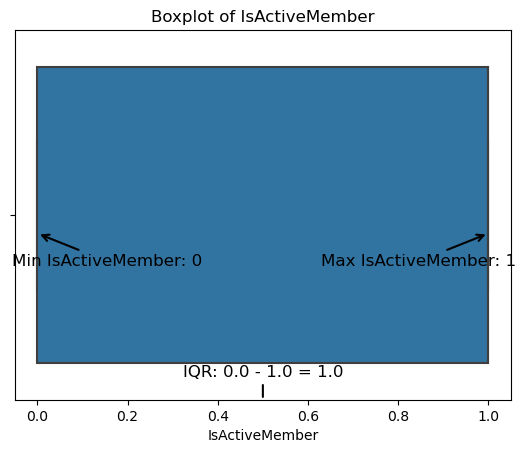

EstimatedSalary


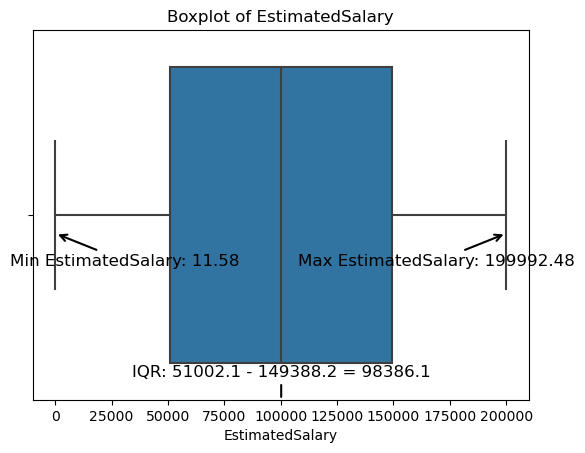

Exited


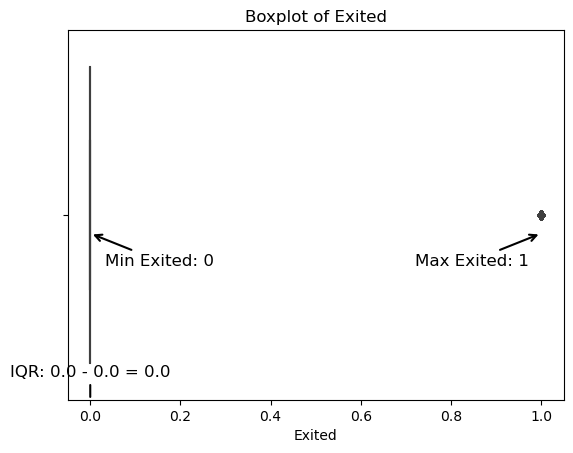

In [68]:
for column in df.describe().columns[1:]:
    print(column)
    plot_boxplot(df,column)

## Distributions

CreditScore


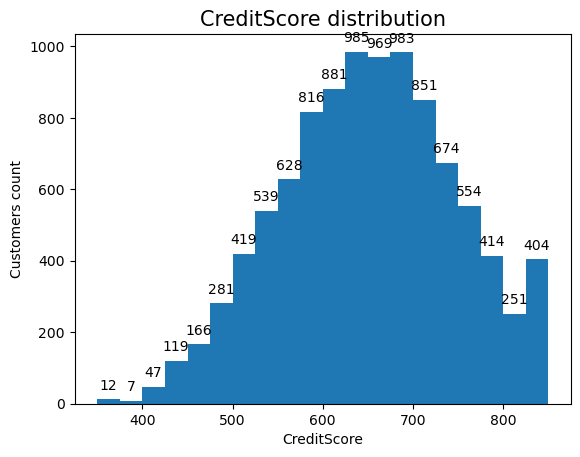

Age


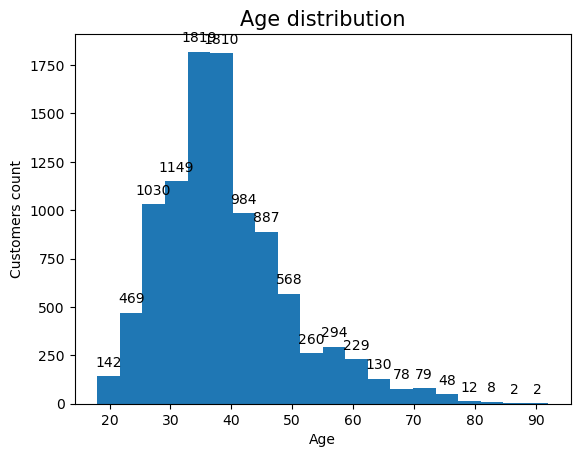

Tenure


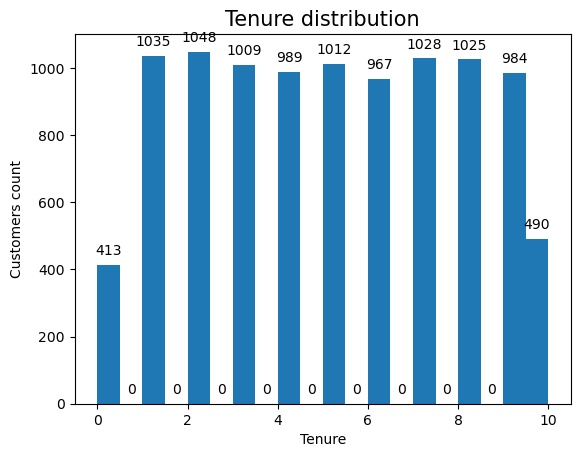

Balance


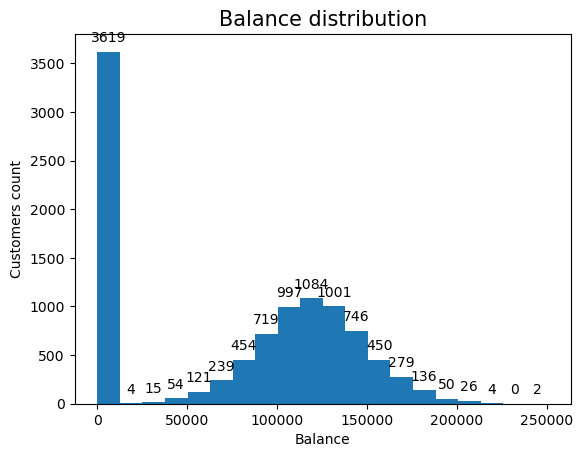

NumOfProducts


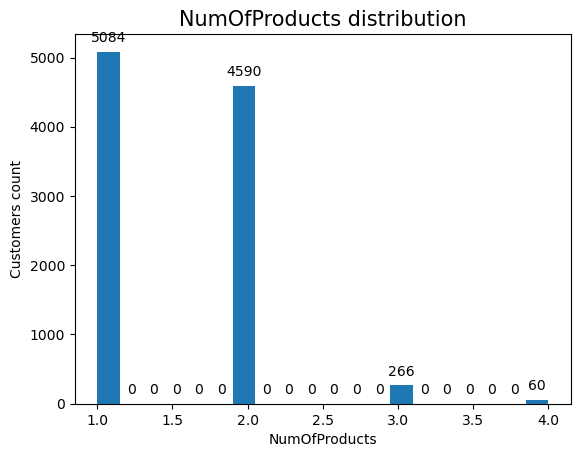

HasCrCard


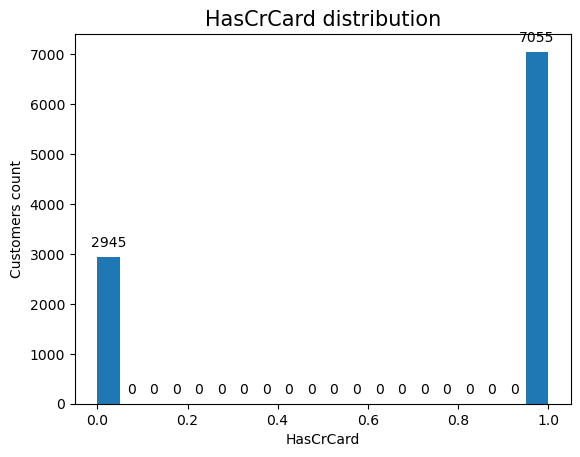

IsActiveMember


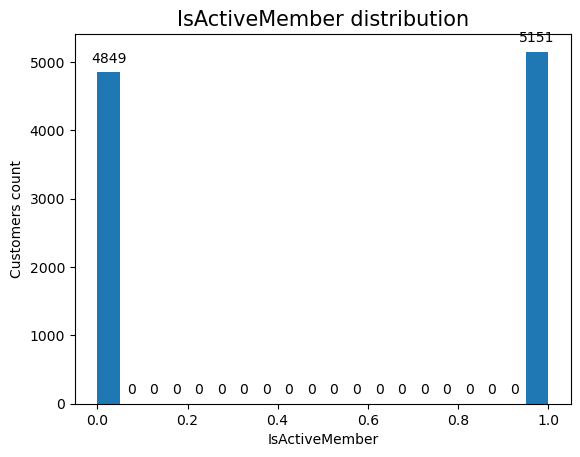

EstimatedSalary


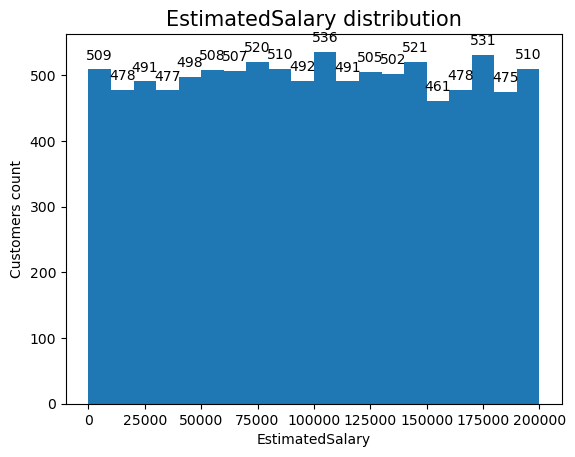

Exited


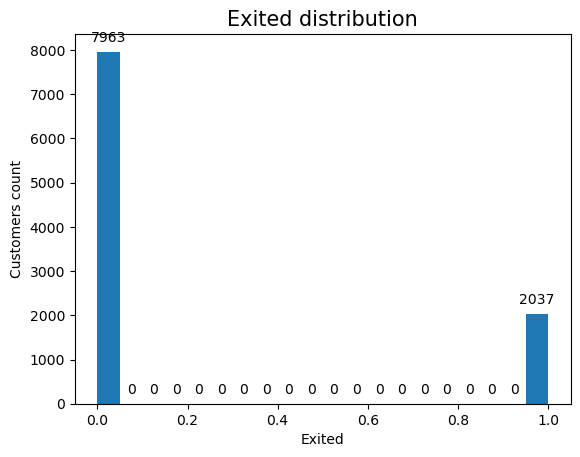

In [69]:
for column in df.describe().columns[1:]:
    print(column)
    plot_distribution(df,column)

## Distribution of columns vs Target

CreditScore


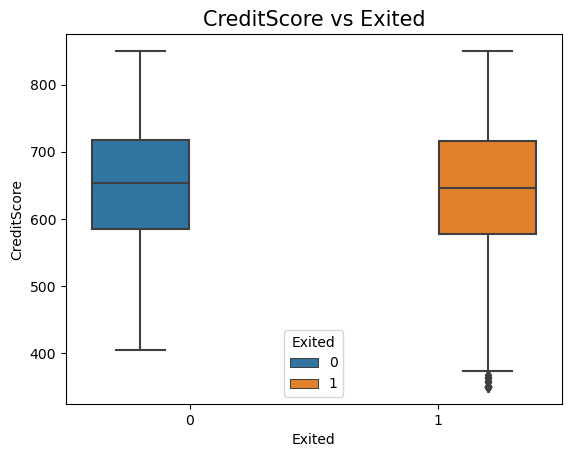

Age


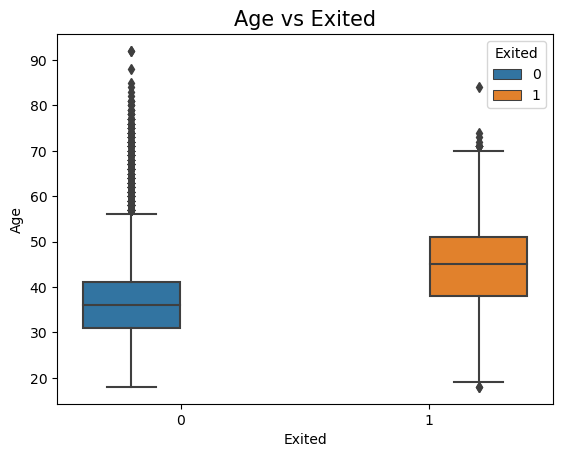

Tenure


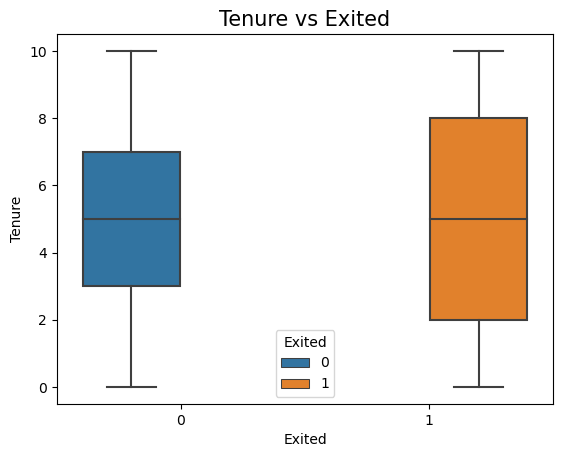

Balance


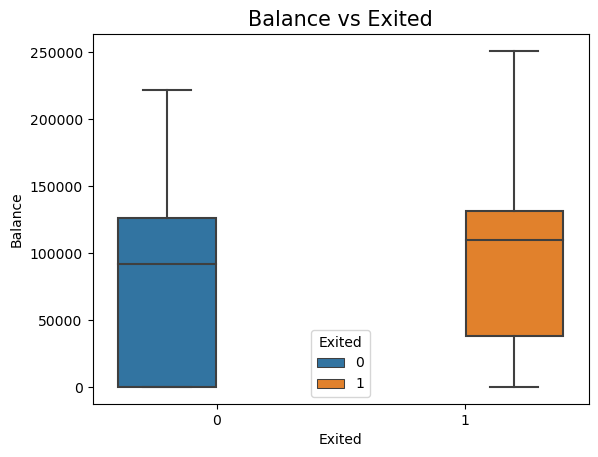

NumOfProducts


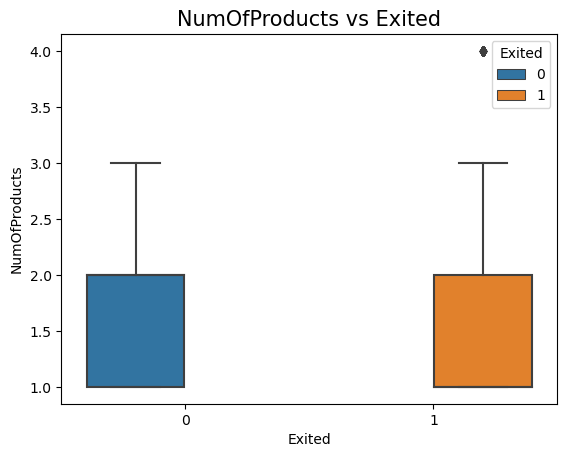

HasCrCard


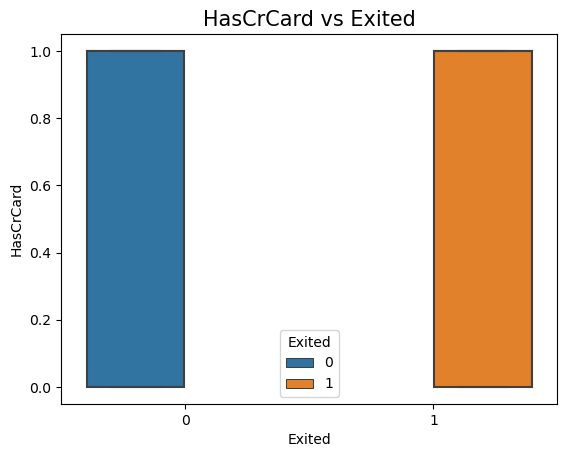

IsActiveMember


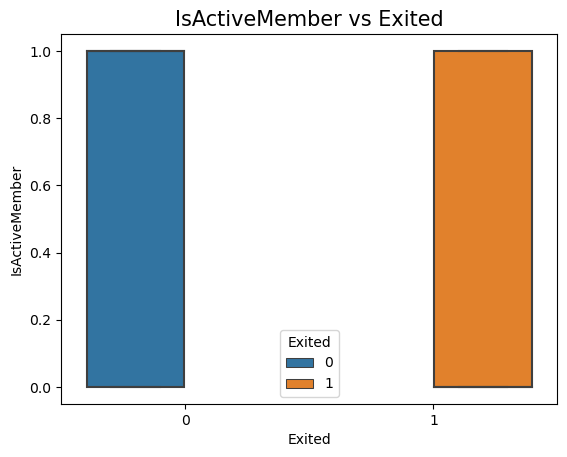

EstimatedSalary


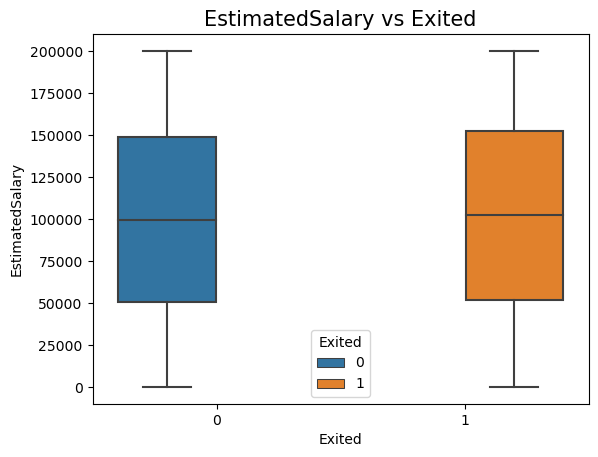

Exited


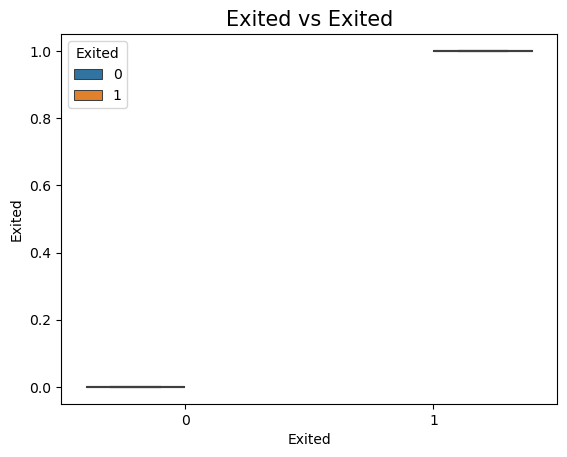

In [115]:
for column in df.describe().columns[1:]:
    print(column)
    plot_target_column_distribution(df, 'Exited', column)

## Categorical vs Target 

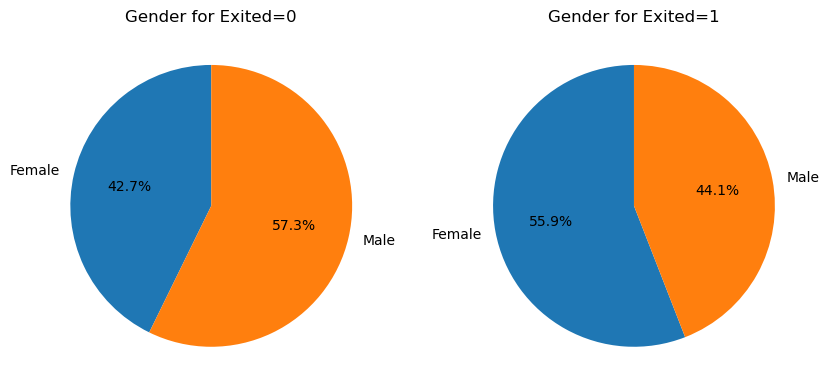

In [132]:
plot_pie_chart(df, "Gender", "Exited")

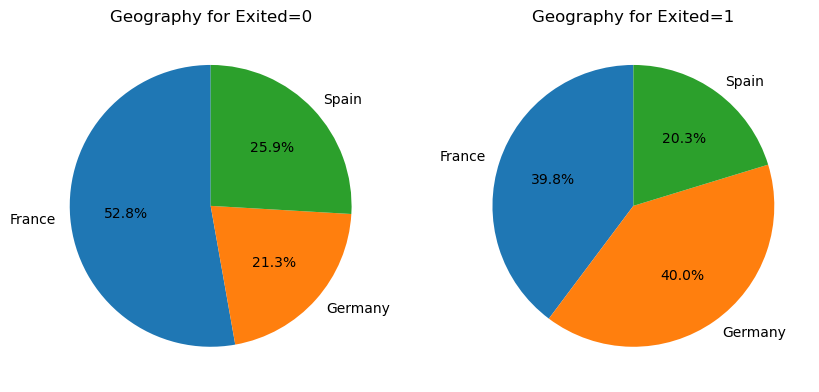

In [135]:
plot_pie_chart(df, "Geography", "Exited")

### Distribution of customer age

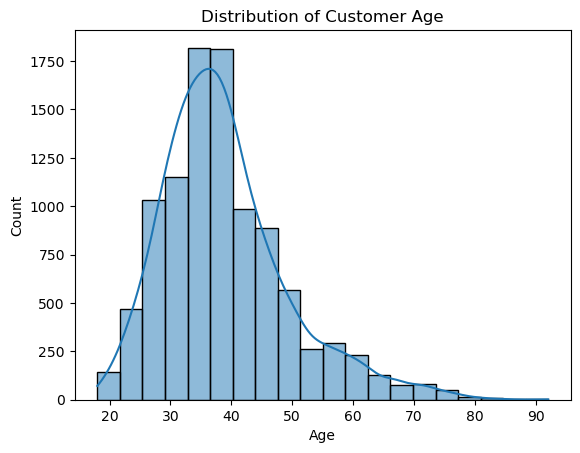

In [52]:
sns.histplot(data=df, x='Age', kde=True, bins=20)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# The age distribution of customers appears to be roughly normally distributed, 
# with most customers falling between 25-50 years old.

### Distribution of Credit score

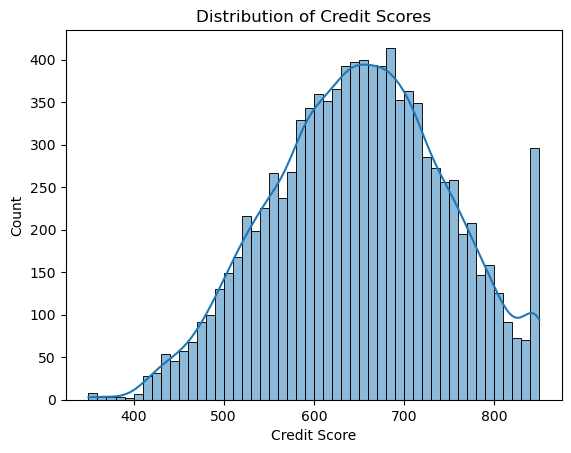

In [31]:
sns.histplot(data=df, x='CreditScore', kde=True, bins=50)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

# The distribution of credit scores appears to be roughly normally distributed,
# with most scores falling between 600-750.

### Distribution of Balance

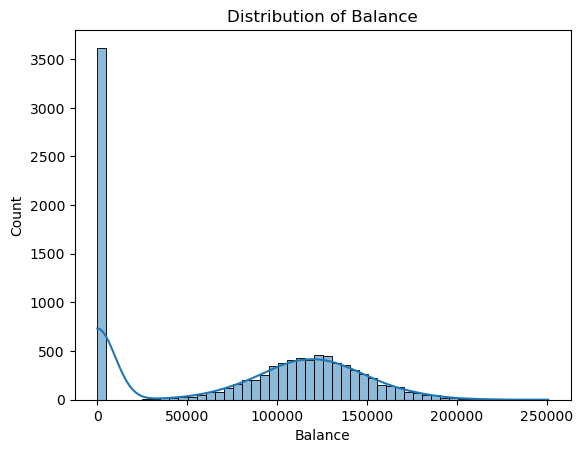

In [13]:
sns.histplot(data=df, x='Balance', kde=True, bins=50)
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()

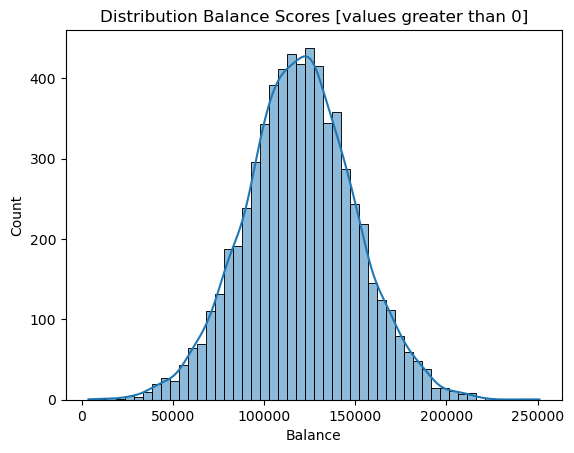

In [11]:
sns.histplot(data=df[df['Balance']!=0], x='Balance', kde=True, bins=50)
plt.title('Distribution Balance Scores [values greater than 0]')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()

### Proportion of customer exited by Gender

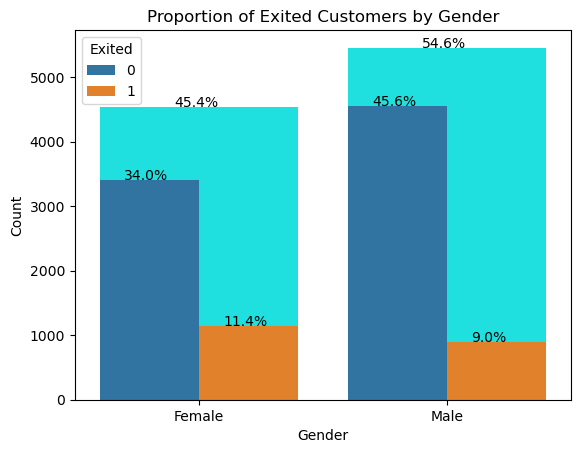

In [46]:
sns.countplot(data=df, x='Gender', color='cyan')
sns.countplot(data=df, x='Gender', hue='Exited')

plt.title('Proportion of Exited Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# add percentage labels
total = float(len(df))
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 0.5
    plt.annotate(percentage, (x, y))

plt.show()

# The proportion of exited customers is roughly the same for male and female customers.

### Churn rate by category

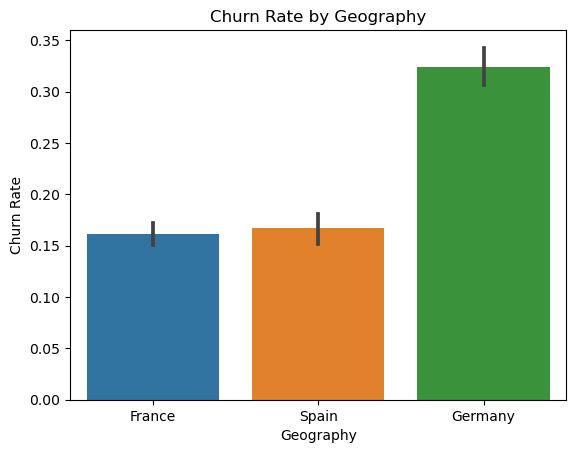

In [49]:
# Churn rate by category

sns.barplot(data=df, x='Geography', y='Exited')
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Churn Rate')
plt.show()

# Customers in Germany appear to have a higher churn rate compared to those in France or Spain.

### Correlation Heatmap

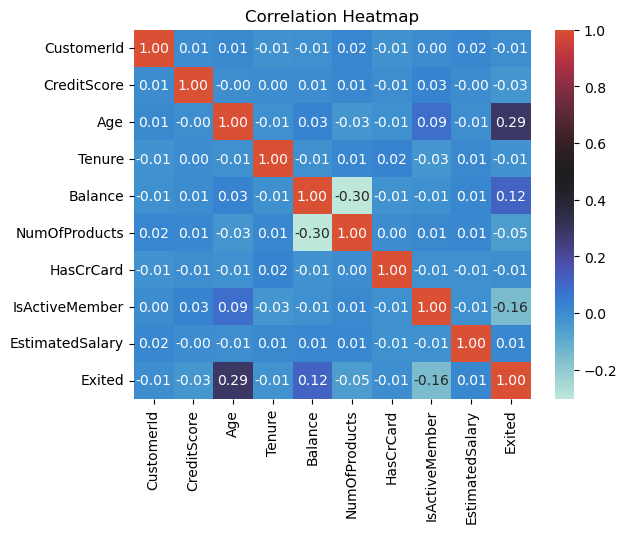

In [56]:
corr = df[df.describe().columns].corr()
sns.heatmap(corr, annot=True, fmt='.2f', center=0.5)
plt.title('Correlation Heatmap')
plt.show()

# From the heatmap, we can see that there are some strong positive correlations between the following variables:

#     NumOfProducts and Balance (0.31)
#     Age and Exited (0.29)

# There are also some strong negative correlations between the following variables:

#     Age and Balance (-0.03)
#     HasCrCard and Exited (-0.01)
#     IsActiveMember and Exited (-0.16)

### Boxplot of Geography vs Balance

<Axes: xlabel='Geography', ylabel='Balance'>

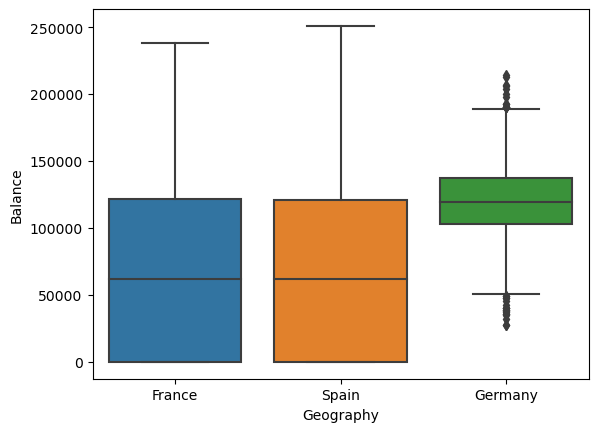

In [62]:
sns.boxplot(x='Geography', y='Balance', data=df)

# From this box plot, we can see that the median balance for customers in Germany is higher 
# compared to customers in France and Spain. 
# We can also see that the distribution of balance for customers in Spain is wider compared to the other countries.

### Pairplot using ['CreditScore', 'Age', 'Balance', 'NumOfProducts']

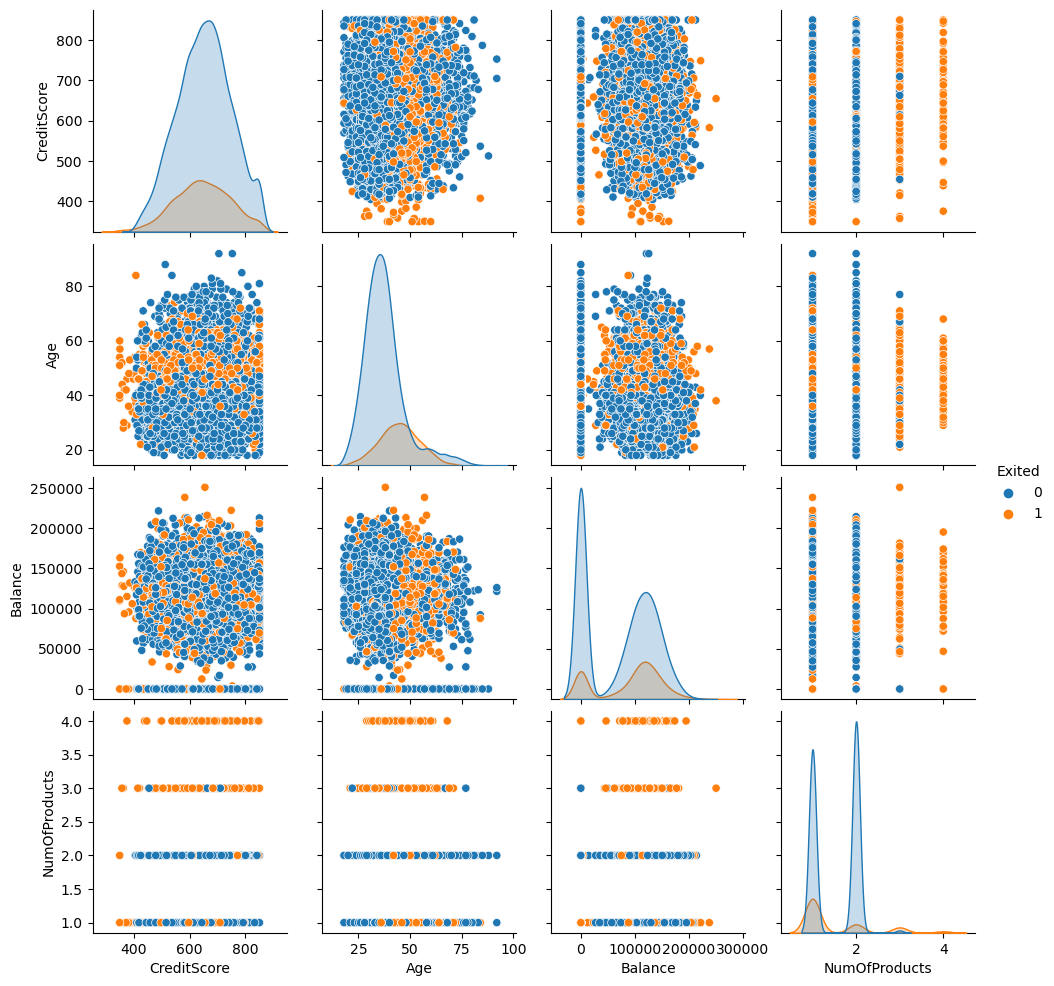

In [15]:
sns.pairplot(data=df, vars=['CreditScore', 'Age', 'Balance', 'NumOfProducts'], hue='Exited')
plt.show()

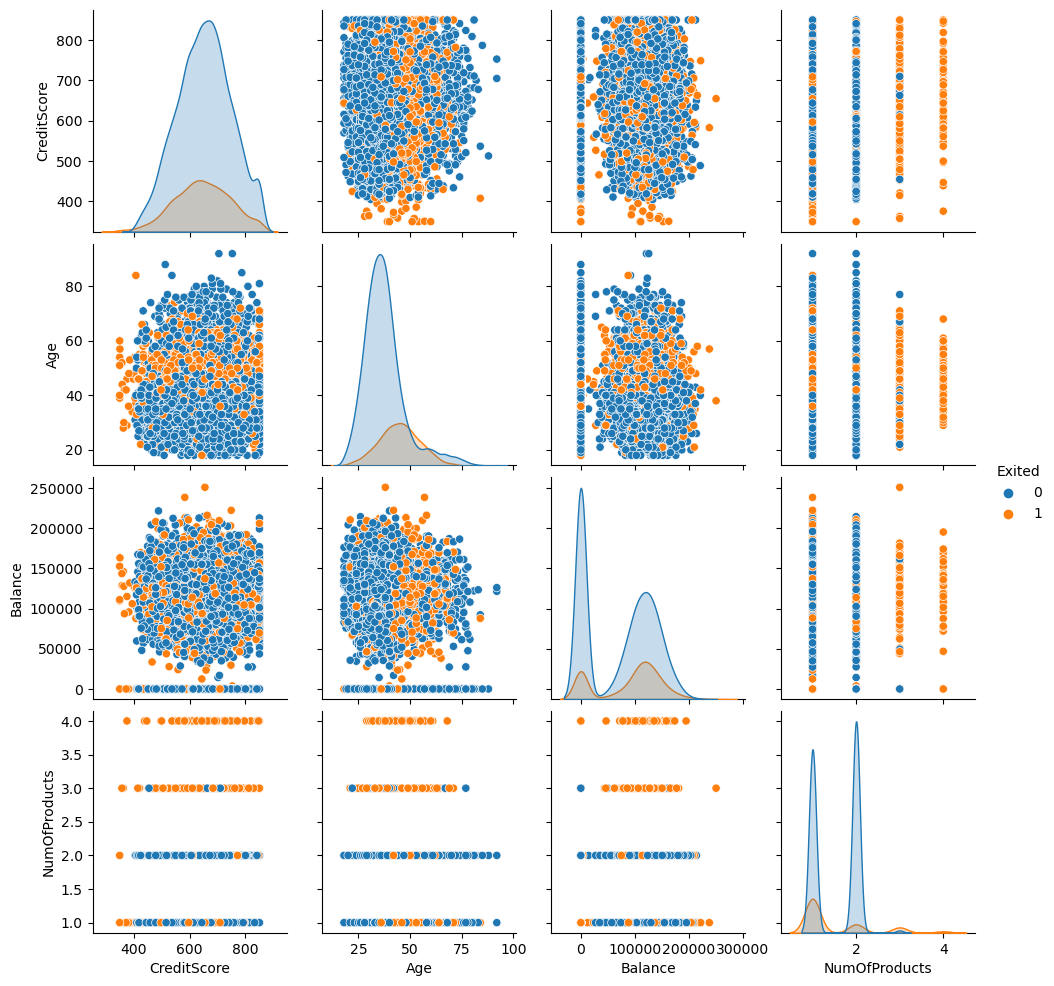

In [17]:
sns_plot = sns.pairplot(data=df, vars=['CreditScore', 'Age', 'Balance', 'NumOfProducts'], hue='Exited')
plt.savefig('output_pairplot.png')